# <font color = 'red'> 3 偏微分方程的数值解
 
以一个最普遍的传热问题为例解释一下偏微分方程的引入：
    
<img src = "Images/3-1.png" alt = 'drawing' align = 'center' style = 'width: 500px'>
    
上面的第一个积分方程，左右两侧通过 <font color = 'red'>**一定体积内的热量在一段时间内是守恒的**</font> 建立起等量关系。左侧表示热量的来源：由于温度梯度从外界输入或从内部流出，以及体积内部热源产生的热量。右侧表示体积内热量的变化，通过质量热容与温度变化值得到。最终得到一个偏微分方程。
    
## <font color = 'blue'> 3.1 一维偏微分方程数值求解</font>

<img src = "Images/3-12.png" alt = "drawing" style = "width: 500px">

其中 i 表示空间角标，k 表示时间离散角标。

二阶偏差分的结果其实就是连续使用两次欧拉法：
$$
\frac{\partial^2}{\partial x^2}u = \frac{\frac{u_{i+1}-u_i}{h} - \frac{u_i-u_{i-1}}{h}}{h} = \frac{u_{i+1}+u_{i-1}-2u_i}{h^2}
$$

因为总是基于此节点（时间/空间）计算下一节点（时间/空间）的数据，所以总是使用前向差分法。
第三个式子即是离散化的偏微分方程。
<img src = "Images/3-13.png" alt = "drawing" style = "width: 500px">

NT 是需要计算的时间步数。

一维情况的稳定条件是 $\frac{ \tau \lambda}{h^2} < \frac{1}{2}$，对于二维，则是 $\frac{ \tau \lambda}{h^2} < \frac{1}{4}$，三维则是 $\frac{ \tau \lambda}{h^2} < \frac{1}{8}$。

<img src = "Images/3-14.png" alt = "drawing" style = "width: 500px">

- 举例：一维热传导问题
    
<img src = "Images/3-15.png" alt = "drawing" style = "width: 500px">
    
<img src = "Images/3-16.png" alt = "drawing" style = "width: 500px">

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------- 初始化参数 ----------------------
tau = 0.05  # 时间步长
h = 0.5  # 空间步长
l = 10  # 空间长度
NT = 1000  # 时间步数
NX = int(l/h)  # 空间步数
lamda = 1  
A = tau*lamda/h**2  # 收敛判据，对于一维情况，此值需要小于 1/2
print(A<1/2)

# --------------------- 初始化 --------------------------
u = np.zeros([NX+1, NT+1])  # 温度场，剖分成 n 段，固然对应 n+1 个格点
t = np.arange(0, NT, 1)
x = np.arange(0, (NX + 1)*h, h)

# ------------------ 边界条件 -------------------------
u[(0, -1), :] = 0  # 边界条件
u[:, 0] = 0.1*x*(10-x)  # 初始条件

# ------------------- 求解偏微分方程 -----------------
for tt in range(NT):
    for xx in range(1,NX):  # 只计算 1~Nx-1 上的点，0 和 Nx 上的点由边界条件保证
        q = 5*np.exp(-2*pow(x[xx] - 5,2))
        u[xx][tt+1] = u[xx][tt] + tau*((u[xx+1][tt] + u[xx-1][tt] - 2*u[xx][tt])/h**2 + q)

True


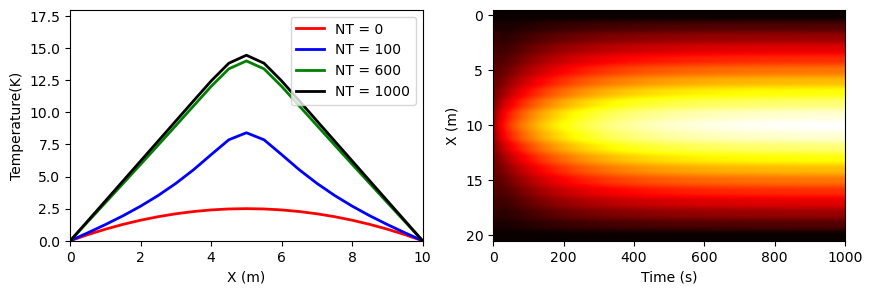

In [8]:
        
# ---------------------- 作图 -----------------------
fig = plt.figure(figsize = (10,3))
ax1 = fig.add_subplot(121)
ax1.plot(x, u[:,0], 'r-', label = 'NT = 0', linewidth = 2)
ax1.plot(x, u[:,100], 'b-', label = 'NT = 100', linewidth = 2)
ax1.plot(x, u[:,600], 'g-', label = 'NT = 600', linewidth = 2)
ax1.plot(x, u[:,1000], 'k-', label = 'NT = 1000', linewidth = 2)
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 18)
ax1.legend(loc='best')
ax1.set_xlabel('X (m)')
ax1.set_ylabel('Temperature(K)')

ax2 = fig.add_subplot(122)
ax2.imshow(u, cmap=plt.cm.hot)
ax2.set_aspect('auto')  # 设置图片显示横纵比
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('X (m)')
plt.show()

## <font color = 'blue'> 3.2 二维偏微分方程数值求解</font>

<img src = "Images/3-17.png" alt = "drawing" style = "width: 500px">
    
<img src = "Images/3-18.png" alt = "drawing" style = "width: 500px">

<img src = "Images/3-19.png" alt = "drawing" style = "width: 500px">

- 举例：二维热传导问题

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------- 初始化参数 ----------------------
tau = 0.05  # 时间步长
h = 0.5  # 空间步长
l = 10  # 空间长度
NT = 1000  # 时间步数
NX = int(l/h)  # 空间步数
NY = int(l/h)  # 空间步长
lamda = 1  
A = tau*lamda/h**2  # 收敛判据，对于一维情况，此值需要小于 1/2
print(A<1/4)

# --------------------- 初始化 --------------------------
u = np.zeros([NX+1, NT+1])  # 温度场，剖分成 n 段，固然对应 n+1 个格点
t = np.arange(0, NT, 1)
x = np.arange(0, (NX + 1)*h, h)

# ------------------ 边界条件 -------------------------
u[(0, -1), :] = 0  # 边界条件
u[:, 0] = 0.1*x*(10-x)  # 初始条件

# ------------------- 求解偏微分方程 -----------------
for tt in range(NT):
    for xx in range(1,NX):  # 只计算 1~Nx-1 上的点，0 和 Nx 上的点由边界条件保证
        q = 5*np.exp(-2*pow(x[xx] - 5,2))
        u[xx][tt+1] = u[xx][tt] + tau*((u[xx+1][tt] + u[xx-1][tt] - 2*u[xx][tt])/h**2 + q)

True
